In [7]:
# import extractData
import os

In [8]:
import json

extractedData = {}
with open(os.getcwd() + "/output.json", 'r') as fp:
    extractedData = json.load(fp)
# print(extractedData)

analysedData = {}
for i, (key, val) in enumerate(extractedData.items()):
    # print(key, val)
    speakerID = key.strip().split('-')[0]
    if speakerID not in analysedData:
        analysedData[speakerID] = {}
    
    if 'totalCount' not in analysedData[speakerID]:
        analysedData[speakerID]['totalCount'] = 1
    else:
        analysedData[speakerID]['totalCount'] += 1
        
    if 'DSCount' not in analysedData[speakerID]:
        analysedData[speakerID]['DSCount'] = 0
    if val['DS']:
        analysedData[speakerID]['DSCount'] += 1
    
    if 'AvgSTOI' not in analysedData[speakerID]:
        analysedData[speakerID]['AvgSTOI'] = 0
    else:
        analysedData[speakerID]['AvgSTOI'] += eval(val['STOI'])

for (key, val) in analysedData.items():
    # print(key, val)
    analysedData[key]['DSR'] = val['DSCount'] / val['totalCount']

total_sum = 0
DS_sum = 0
stoi_sum = 0
for (key, val) in analysedData.items():
    # print(key, val)
    total_sum += val['totalCount']
    DS_sum += val['DSCount']
    stoi_sum += val['AvgSTOI']
    analysedData[key]['AvgSTOI'] /= analysedData[key]['totalCount']
    print(f"DSR for SpeakerID-{key} = {val['DSR'] * 100:.2f} %")
    print(f"AvgSTOI for SpeakerID-{key} = {val['AvgSTOI']:.2f}")
    

stoi_avg = stoi_sum / total_sum
# print(total_sum)
# print(DS_sum)
print(f"DSR for All Speakers = {DS_sum/total_sum * 100:.2f} %")
print(f"STOI for All Speakers = {stoi_avg:.2f}")

DSR for SpeakerID-4970 = 90.48 %
AvgSTOI for SpeakerID-4970 = 0.66
DSR for SpeakerID-1580 = 97.14 %
AvgSTOI for SpeakerID-1580 = 0.66
DSR for SpeakerID-1221 = 90.24 %
AvgSTOI for SpeakerID-1221 = 0.56
DSR for SpeakerID-3729 = 65.96 %
AvgSTOI for SpeakerID-3729 = 0.59
DSR for SpeakerID-4507 = 76.67 %
AvgSTOI for SpeakerID-4507 = 0.64
DSR for SpeakerID-5142 = 87.25 %
AvgSTOI for SpeakerID-5142 = 0.66
DSR for SpeakerID-5639 = 38.10 %
AvgSTOI for SpeakerID-5639 = 0.59
DSR for SpeakerID-7729 = 82.98 %
AvgSTOI for SpeakerID-7729 = 0.56
DSR for SpeakerID-5105 = 82.14 %
AvgSTOI for SpeakerID-5105 = 0.62
DSR for SpeakerID-237 = 88.64 %
AvgSTOI for SpeakerID-237 = 0.65
DSR for SpeakerID-1995 = 90.28 %
AvgSTOI for SpeakerID-1995 = 0.62
DSR for SpeakerID-2830 = 86.67 %
AvgSTOI for SpeakerID-2830 = 0.63
DSR for SpeakerID-672 = 77.33 %
AvgSTOI for SpeakerID-672 = 0.60
DSR for SpeakerID-8555 = 90.32 %
AvgSTOI for SpeakerID-8555 = 0.61
DSR for SpeakerID-8463 = 90.54 %
AvgSTOI for SpeakerID-8463 = 0.67

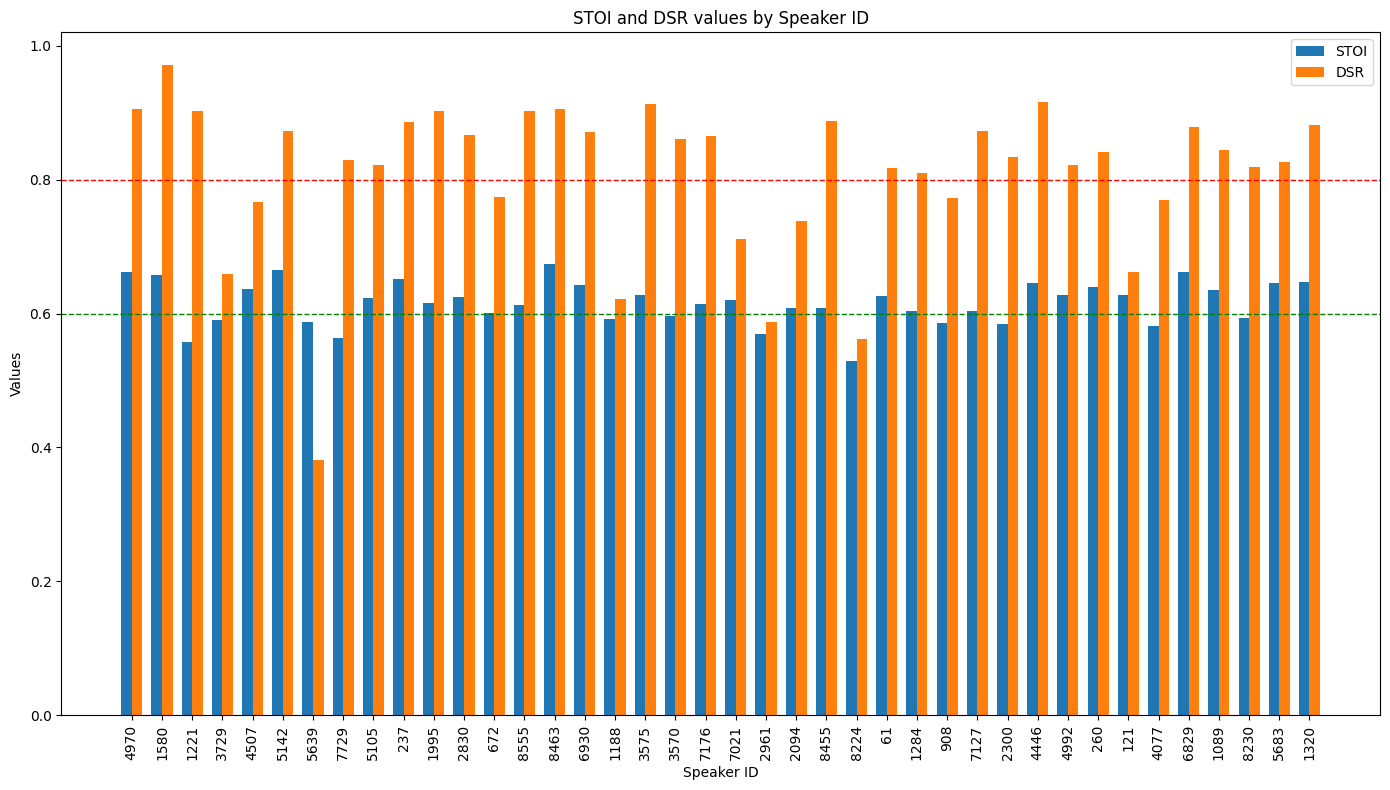

spearker 数量:  40
DSR超过80.0%的speaker数量:  28


In [9]:
# print(analysedData)
with open(os.getcwd() + '/analysedData.json', 'w') as fp:
    json.dump(analysedData, fp)
    
import matplotlib.pyplot as plt
data = analysedData  # 画图数据

# 解析数据，获取ID和对应的AvgSTOI和DSR值
ids = list(data.keys())
avg_stoi_values = [stats['AvgSTOI'] for stats in data.values()]
dsr_values = [stats['DSR'] for stats in data.values()]

# 设置条形图宽度
bar_width = 0.35
# 设置ID在x轴上的位置
index = range(len(ids))

# 创建一个图和一个子图
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制STOI的条形图
stoi_bars = ax.bar(index, avg_stoi_values, bar_width, label='STOI')

# 绘制DSR的条形图
dsr_bars = ax.bar([i + bar_width for i in index], dsr_values, bar_width, label='DSR')


ax.legend()
ax.set_xlabel('Speaker ID')
ax.set_ylabel('Values')
ax.set_title('STOI and DSR values by Speaker ID')

# 设置x轴刻度标签
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(ids, rotation=90)

# 在y=0.8处画一条虚线
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=1)
# 在y=0.6处画一条虚线
plt.axhline(y=0.6, color='g', linestyle='--', linewidth=1)

# 显示图表
plt.tight_layout()
plt.show()

# 人数情况
totalCount = 0
AvgDSCount = 0 
DSRThreshold = 0.8
for (key, val) in analysedData.items():
    # print(key, val)
    totalCount += 1
    if analysedData[key]['DSR'] > DSRThreshold:
        AvgDSCount += 1
print("spearker 数量: ", totalCount)
print(f"DSR超过{DSRThreshold*100}%的speaker数量: ", AvgDSCount)
# print(f"STOI")


In [10]:
analysedData = {}
import json
with open(os.getcwd() + '/WADoutput.json', 'r') as fp:
    analysedData = json.load(fp)
print(analysedData)

data = {}
for (key, val) in analysedData.items():
    speakerID = key.split('-')[0]
    if speakerID not in data:
        data[speakerID] = {'cnt': 0, 'WAD_Sum': 0, 'AvgWAD': 0}
    data[speakerID]['cnt'] += 1
    data[speakerID]['WAD_Sum'] += eval(val['WAD'])
for (key, val) in data.items():
    speakerID = key.split('-')[0]
    data[speakerID]['AvgWAD'] = data[speakerID]['WAD_Sum'] / data[speakerID]['cnt']
print(len(analysedData))


        

{'4970-29095-0000.flac': {'WAD': '0.5'}, '4970-29095-0017.flac': {'WAD': '0.3'}, '4970-29095-0014.flac': {'WAD': '0.14285714285714285'}, '4970-29095-0001.flac': {'WAD': '0.6060606060606061'}, '4970-29095-0009.flac': {'WAD': '0.9'}, '4970-29095-0013.flac': {'WAD': '0.5'}, '4970-29095-0020.flac': {'WAD': '0.5588235294117647'}, '4970-29095-0022.flac': {'WAD': '0.3076923076923077'}, '4970-29095-0035.flac': {'WAD': '0.2'}, '4970-29095-0037.flac': {'WAD': '0.5555555555555556'}, '4970-29095-0015.flac': {'WAD': '0.8'}, '4970-29095-0016.flac': {'WAD': '0.125'}, '4970-29095-0023.flac': {'WAD': '0.6666666666666666'}, '4970-29095-0032.flac': {'WAD': '0.8333333333333333'}, '4970-29095-0006.flac': {'WAD': '0.4666666666666667'}, '4970-29095-0031.flac': {'WAD': '0.22857142857142854'}, '4970-29095-0034.flac': {'WAD': '0.125'}, '4970-29095-0033.flac': {'WAD': '0.4666666666666667'}, '4970-29095-0012.flac': {'WAD': '1.4285714285714286'}, '4970-29095-0029.flac': {'WAD': '0.15384615384615385'}, '4970-29095-

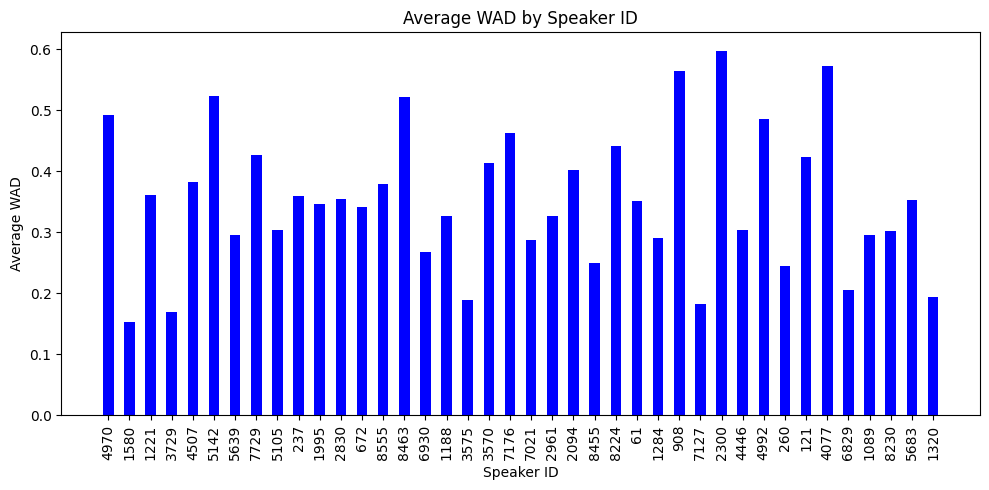

In [11]:
# 解析数据，获取ID和对应的AvgWAD值
ids = list(data.keys())
avg_wad_values = [stats['AvgWAD'] for stats in data.values()]


bar_width = 0.5
index = range(len(ids))

plt.figure(figsize=(10, 5)) 
plt.bar(index, avg_wad_values, bar_width, color='blue')

plt.xlabel('Speaker ID')
plt.ylabel('Average WAD')
plt.title('Average WAD by Speaker ID')
plt.xticks(index, ids, rotation=90)  

plt.tight_layout() 
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average WAD for all Audio file 0.3461979096344914


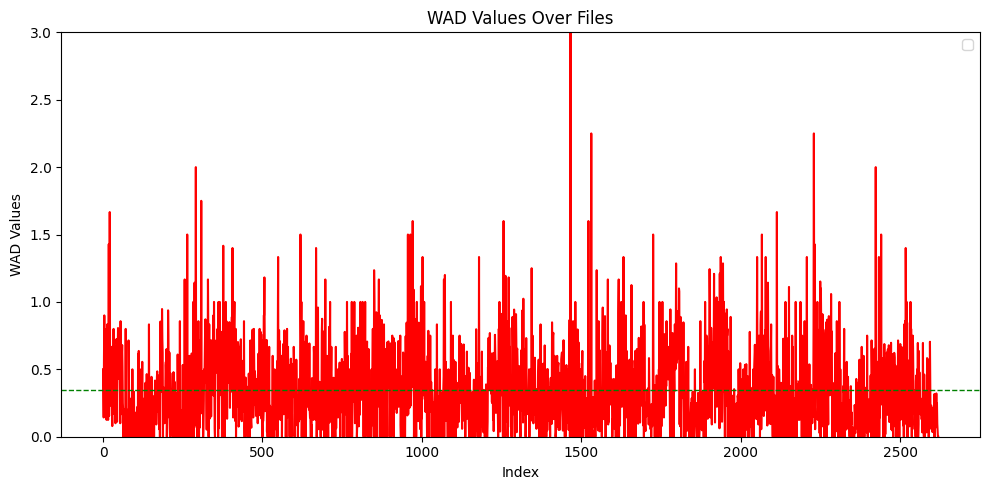

In [15]:
data = analysedData

cnt = 0
WADSum = 0
for (key, val) in data.items():
    WADSum += eval(val['WAD'])
    cnt += 1
avgWADforAllAudio = WADSum / cnt
print("Average WAD for all Audio file", avgWADforAllAudio)

wad_values = [float(stats['WAD']) for stats in data.values()]

x_values = list(range(len(wad_values)))

plt.figure(figsize=(10, 5))  # 设置图表大小
# plt.scatter(x_values, wad_values, color='blue', label='WAD Values')

plt.plot(x_values, wad_values, color='red')

plt.xlabel('Index')
plt.ylabel('WAD Values')
plt.title('WAD Values Over Files')
plt.legend()

plt.ylim(-0, 3)
plt.axhline(y=avgWADforAllAudio, color='g', linestyle='--', linewidth=1)
# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()

